# Fashion MNIST Image classification using neural network


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras

In [13]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [14]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [15]:
y_train.shape,y_test.shape

((60000,), (10000,))

**Dataset contain 70000 records**

In [16]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [17]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [18]:
y_train[0]

9

#### Data Visualization

9


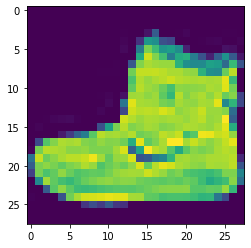

In [19]:
plt.imshow(X_train[0])
print(y_train[0])

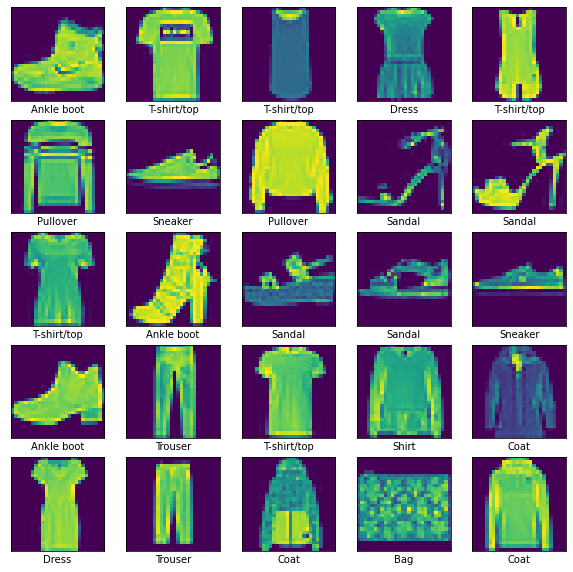

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i]])
plt.show()

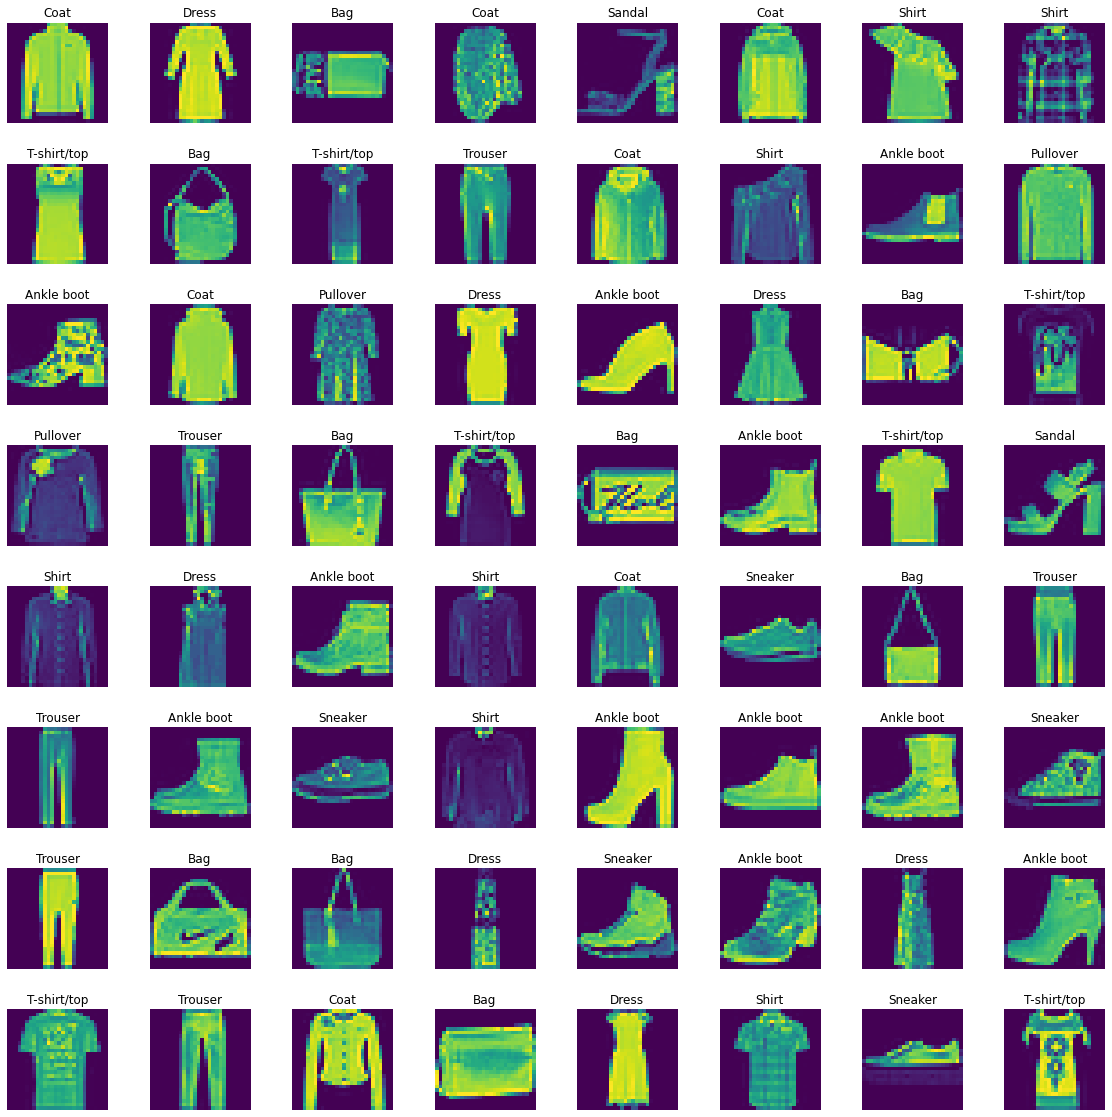

In [21]:
fig,axes = plt.subplots(8,8,figsize = (20,20))
axes = axes.ravel();

for i in np.arange(0,64):
    index_num = np.random.randint(0,50000)
    axes[i].imshow(X_train[index_num])
    axes[i].set_title(class_names[y_train[index_num]])
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

### Data Preprocessing

In [22]:
X_train = X_train / 255
X_test = X_test / 255

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow

In [24]:
## keras documentation

stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,restore_best_weights=False,start_from_epoch=0)


In [25]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu',input_shape=(28,28,1)))
model.add(AveragePooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D( 64,  (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

In [26]:
model.add(Flatten())

model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(10,activation='softmax')) # output layer 

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d (Average  (None, 13, 13, 32)        0         
 Pooling2D)                                                      
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 5, 5, 64)          0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [28]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
model_history = model.fit(X_train,y_train,validation_split=0.33,batch_size= 50,epochs = 100,callbacks= [stopping])

Epoch 1/100
804/804 [==============================] - 48s 56ms/step - loss: 0.9052 - accuracy: 0.6566 - val_loss: 0.6326 - val_accuracy: 0.7310
Epoch 2/100
804/804 [==============================] - 38s 47ms/step - loss: 0.6269 - accuracy: 0.7654 - val_loss: 0.5236 - val_accuracy: 0.8020
Epoch 3/100
804/804 [==============================] - 36s 44ms/step - loss: 0.5683 - accuracy: 0.7904 - val_loss: 0.4799 - val_accuracy: 0.8188
Epoch 4/100
804/804 [==============================] - 39s 48ms/step - loss: 0.5246 - accuracy: 0.8047 - val_loss: 0.4482 - val_accuracy: 0.8350
Epoch 5/100
804/804 [==============================] - 36s 45ms/step - loss: 0.4927 - accuracy: 0.8183 - val_loss: 0.4277 - val_accuracy: 0.8418
Epoch 6/100
804/804 [==============================] - 35s 43ms/step - loss: 0.4681 - accuracy: 0.8289 - val_loss: 0.4029 - val_accuracy: 0.8514
Epoch 7/100
804/804 [==============================] - 35s 44ms/step - loss: 0.4420 - accuracy: 0.8355 - val_loss: 0.3806 - val_ac

### Model Evaluation 

In [30]:
test_accuracy = model.evaluate(X_test,y_test)[1]

313/313 [==============================] - 2s 6ms/step - loss: 0.3218 - accuracy: 0.8808


In [31]:
print("Test Loss and Test Accuracy: {}".format(model.evaluate(X_test,y_test)))

313/313 [==============================] - 2s 7ms/step - loss: 0.3218 - accuracy: 0.8808
Test Loss and Test Accuracy: [0.32183384895324707, 0.8808000087738037]


In [32]:
pred_class=model.predict(X_test) 


313/313 [==============================] - 2s 7ms/step


In [33]:
pred_class

array([[4.5432849e-08, 7.8665831e-11, 1.1669600e-10, ..., 3.4933660e-02,
        4.1296980e-07, 9.6476763e-01],
       [4.2764525e-04, 1.1518177e-07, 9.9377751e-01, ..., 1.1508853e-13,
        1.9146237e-05, 3.6853151e-12],
       [1.5200831e-09, 9.9999970e-01, 6.2735972e-10, ..., 5.2192730e-16,
        6.0397674e-09, 5.4761249e-14],
       ...,
       [3.0540230e-07, 1.4786101e-09, 2.0361170e-10, ..., 2.2945892e-09,
        9.9999958e-01, 4.6745086e-10],
       [2.1118714e-08, 9.9999136e-01, 1.0213532e-08, ..., 2.5394974e-14,
        7.8800149e-08, 4.4033731e-12],
       [5.0474884e-04, 2.5204261e-05, 4.8280690e-05, ..., 1.7683570e-01,
        4.3237273e-02, 6.6009574e-03]], dtype=float32)

In [34]:
pred_class = pred_class.argmax(1)
pred_class

array([9, 2, 1, ..., 8, 1, 5])

In [35]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

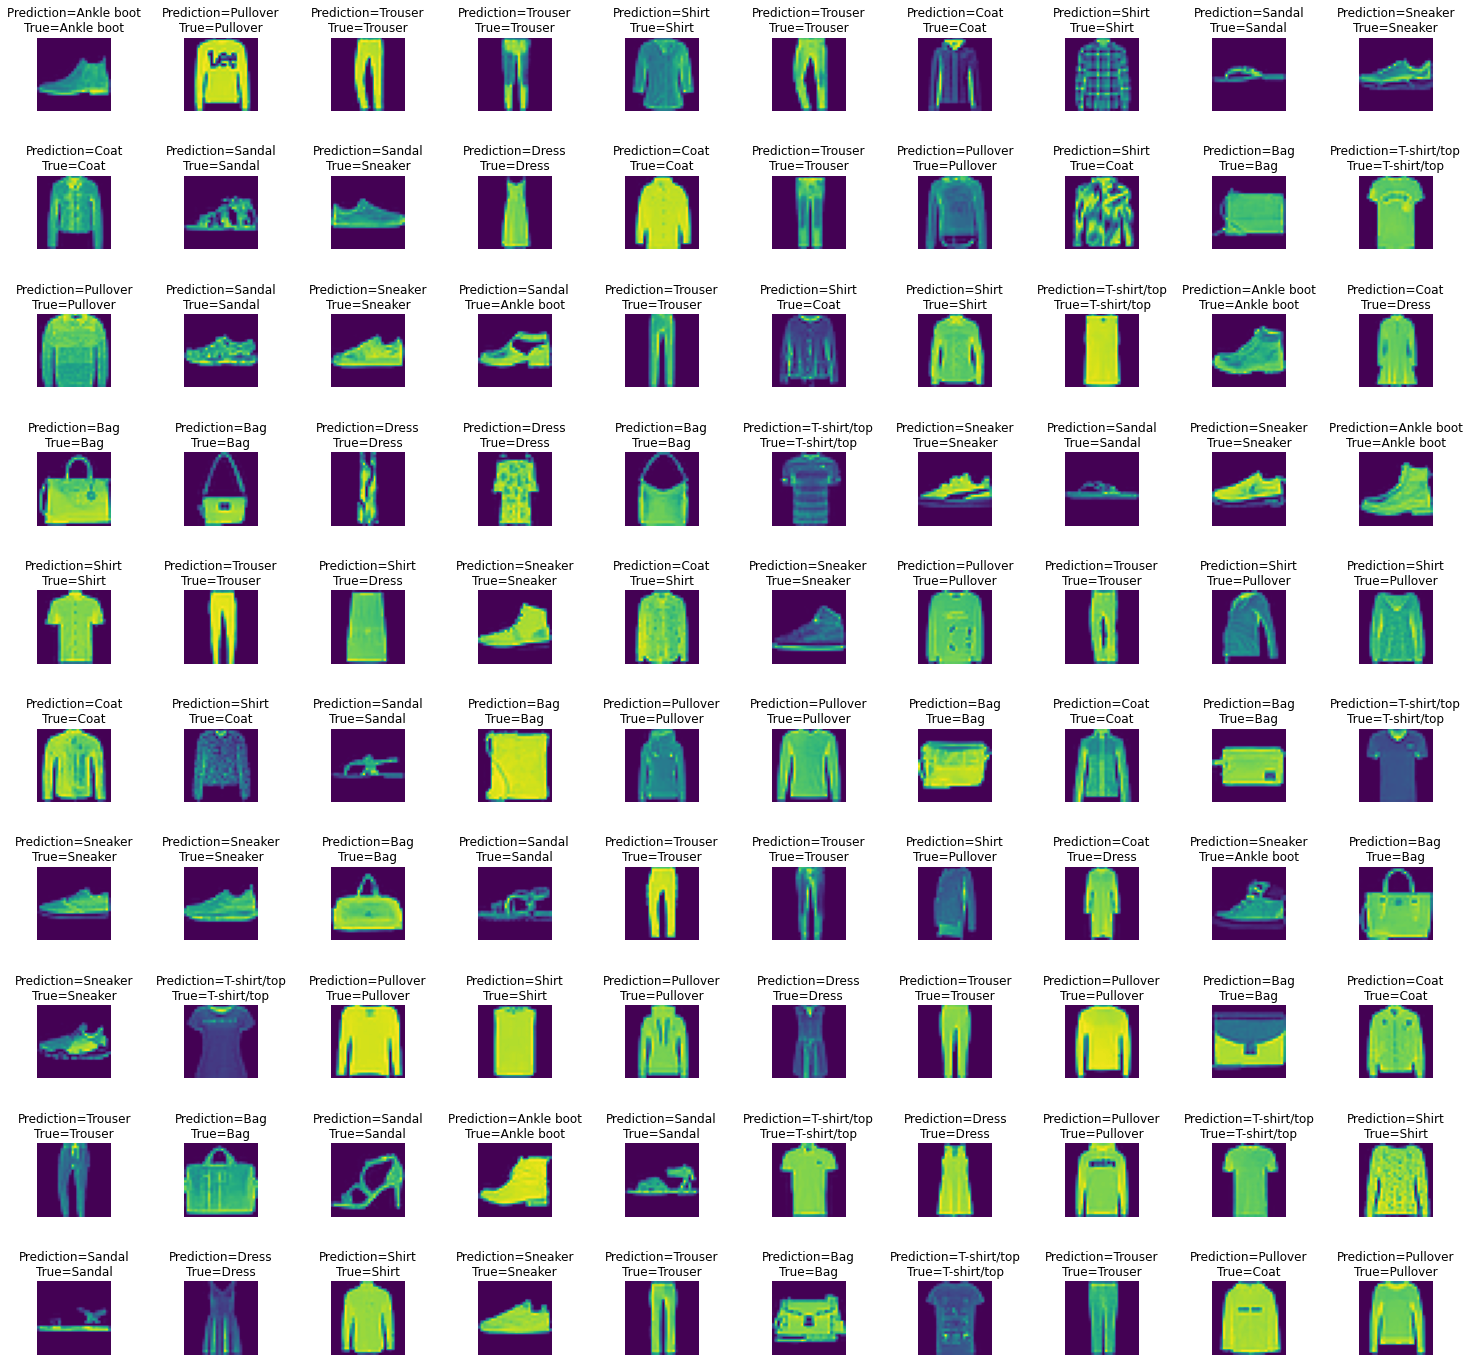

In [36]:
fig,axes = plt.subplots(10,10,figsize = (25,25))
axes = axes.ravel();

for i in np.arange(0,100):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\nTrue={}".format(class_names[pred_class[i]],class_names[y_test[i]]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

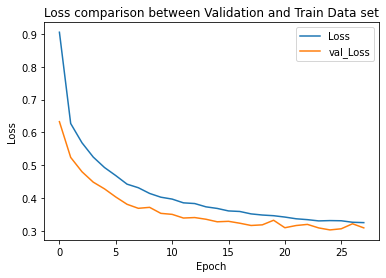

In [37]:
plt.plot(model_history.history['loss'],label ='Loss')
plt.plot(model_history.history['val_loss'],label = 'val_Loss')
plt.title('Loss comparison between Validation and Train Data set')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

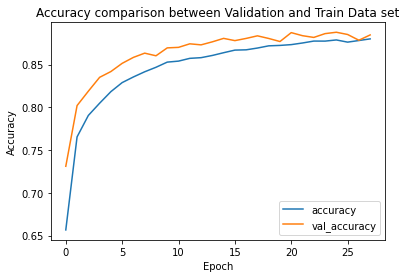

In [38]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy comparison between Validation and Train Data set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report

cm = confusion_matrix(y_test,pred_class)
cm


array([[780,   0,  30,  40,   5,   0, 137,   0,   8,   0],
       [  0, 969,   0,  24,   2,   0,   3,   0,   2,   0],
       [  7,   0, 797,  18,  73,   0, 102,   0,   3,   0],
       [  6,   1,  25, 895,  25,   0,  44,   0,   2,   2],
       [  1,   0,  28,  32, 797,   0, 140,   0,   2,   0],
       [  0,   0,   0,   3,   0, 953,   0,  27,   2,  15],
       [ 84,   0,  67,  38,  74,   0, 727,   0,  10,   0],
       [  0,   0,   0,   0,   0,   4,   0, 972,   0,  24],
       [  0,   0,   6,   5,   2,   2,  10,   2, 972,   1],
       [  0,   0,   0,   0,   0,   5,   1,  48,   0, 946]])

In [40]:
print(classification_report(y_test,pred_class))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1000
           1       1.00      0.97      0.98      1000
           2       0.84      0.80      0.82      1000
           3       0.85      0.90      0.87      1000
           4       0.81      0.80      0.81      1000
           5       0.99      0.95      0.97      1000
           6       0.62      0.73      0.67      1000
           7       0.93      0.97      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



In [41]:
print(accuracy_score(y_test,pred_class))

0.8808
